The purpose of this file is to bring the CombinedCSI.mat files and the masks into .npy format for further processing and save them.

In [1]:
Vol = '4_Paul'

import sys
import os

sys.path.append('../scripts')
sys.path.append('../models')

os.environ["CUDA_VISIBLE_DEVICES"]= '2' #, this way I would choose GPU 3 to do the work

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
import time
import h5py
import matplotlib.pyplot as plt
from scipy.ndimage import zoom # for compressing images / only for testing purposes to speed up NN training
from scipy.fft import fft2, fftshift
from scipy.io import loadmat
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
import torch.nn as nn
from scipy.io import savemat
import nibabel as nib
import h5py

import plotly.graph_objects as go

In [9]:

# Load directly as complex from the HDF5 file

with h5py.File(f'Vol{Vol}/OriginalData/CombinedCSI.mat', 'r') as f:
    print(list(f.keys()))  # List top-level variables
    mask = f['mask'][:]

with h5py.File(f'Vol{Vol}/OriginalData/MASKCSI.mat', 'r') as f:
    print(list(f.keys()))  # List top-level variables
    mask_2 = f['mask'][:]


['#refs#', 'IsWatRef', 'NoiseCorrMat_post', 'NoiseScalingMatrix_spectral', 'NoiseScalingMatrix_time', 'Par', 'ReadInInfo', 'csi', 'mask', 'weights']
['#refs#', 'IsWatRef', 'Par', 'mask']


In [10]:
mask_2.shape

(39, 64, 64)

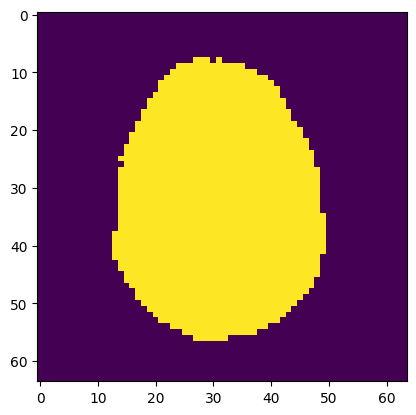

In [13]:
z = 20

Slice = mask[z, :,:]

plt.imshow(Slice)

In [8]:
mask.shape

(39, 64, 64)

In [11]:
import matplotlib.pyplot as plt

z, t = 15, 4

Lipid_Mask = lipid_mask[:, :, z]
Brain_Mask = mask_tr[:, :, z]
DATA = np.abs(data_tr[:, :, z, t])

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(Lipid_Mask, cmap='plasma')
plt.title('Lipid Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Brain_Mask, cmap='plasma')
plt.title('Brain Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(DATA, cmap='plasma')
plt.title('Data (abs)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'lipid_mask' is not defined